# Libraries

In [2]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pds
import scipy
import seaborn as sns
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from IPython.core.display import Image, display
from scipy import stats
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from plot_sklearn_dendrogram import plot_sklearn_dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage
from pandas.plotting import parallel_coordinates
import graphviz 
from sklearn import tree
%matplotlib inline
np.random.seed(10)
random.seed(10)
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing # to scale data
from sklearn.metrics import silhouette_score
from pandas.plotting import parallel_coordinates

# Définition des fonctions

In [75]:
def confusion_matrix(c1,c2, alg1 , alg2, Labc1_def , Labc2_def, labc1 , labc2 ):
    """Retourne la matrice de contingence de deux clusterings c1 et c2."""
    if Labc1_def == True :
        Cla1 = c1.labels_
    else : 
        Cla1 = labc1
        
        
    if Labc2_def == True :
        Cla2 = c2.labels_
    else :
        Cla2 = labc2
 
    Cla1 = list(Cla1) 
    Cla2 = list(Cla2)
    for i in range(len(Cla1)):            
        if alg1 == 'km':
            Cla1[i] = 'km' + str(Cla1[i])
        elif alg1 == 'db':
            Cla1[i] = 'db' + str(Cla1[i])
        elif alg1 == 'cah':
            Cla1[i] = 'cah' + str(Cla1[i])
        else :
            return ('wrong name')
                
    for i in range(len(Cla2)):            
        if alg2 == 'km':
            Cla2[i] = 'km' + str(Cla2[i])
        elif alg2 == 'db':
            Cla2[i] = 'db' + str(Cla2[i])            
        elif alg2 == 'cah':
            Cla2[i] = 'cah' + str(Cla2[i])
        else :
            return ('wrong name')        
    
    Lab1 = map(str,sorted(set(Cla1)))
    Lab2 = map(str,sorted(set(Cla2)))
    allLabels = Lab1 + Lab2
    cm = metrics.confusion_matrix(Cla1, Cla2, labels=allLabels)
    cmdf = pds.DataFrame(data=cm, copy=True, index=allLabels, columns=allLabels).loc[Lab1, Lab2]
    cmdf = cmdf.transpose() # pour avoir les classeen ligne et les cluster en colonne (ou l'invese)
    
    return cmdf

In [3]:
def compute_stability(k,df,iterations=100):
    silhouette_coef = []
    for i in range(iterations):
        km = KMeans(n_clusters=k, n_init=1, random_state=i) # create a KMeans object
        km.fit(DF_kmeans1)
        labels = km.predict(DF_kmeans1)
        silhouette_coef.append(silhouette_score(DF_kmeans1, labels, metric='euclidean', sample_size=None))
    silhouette_coef = np.asarray(silhouette_coef)
    return(silhouette_coef.std())

In [4]:
def fancy_dendrogram(*args, **kwargs):
    '''This function allows to draw a dendrogram, with distances annoted inside the dendogram
      Function of Jörn's Blog :
      (https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/)  '''
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [5]:
def kmeans_SSE(df,ax):
    """Plots SSE evolution for different clusters numbers (from 1 to 15) for a dataframe df."""
    sse = []
    Ks = range(1, 15)
    for k in Ks:
        km = KMeans(n_clusters=k, n_init=20, random_state=k) # create a KMeans object
        km.fit(df)
        #distance.append(np.sqrt(km.inertia_))
        sse.append(km.inertia_)
    ax.plot(Ks,sse)
    ax.set_xlabel("$k$",fontsize=20)
    ax.set_ylabel("SSE",fontsize=14)
    return sse

In [6]:
def kmeans_1D(attribute,n):
    """Prend en entrée un nparray et n clusters"""
    km1 = KMeans(n_clusters=n) # create a KMeans object
    km1.fit(attribute.reshape(-1,1))
    return km1

In [7]:
def plot_dendro_km(df,km):
    """Plots the dendrogram for a specified clustering km and a table df.
    Returns the Agglomerative clustering object."""
    DF_Dendro1 = df.copy(deep=True)
    agc = AgglomerativeClustering(n_clusters=len(km.cluster_centers_), affinity="euclidean", linkage="complete")
    agc.fit(DF_Dendro1)
    plt.title('Hierarchical Clustering Dendrogram')
    plot_sklearn_dendrogram(agc, labels=agc.labels_)
    plt.show()
    return agc

In [8]:
def plot_kmeans1D(attr,labels):
    """Entree : liste ou nparray"""
   # at  = sorted(attr )
    at = attr
    x_ind = range(0, len(at))
    plt.hist(at);

    plt.show()

In [9]:
# 3D plot using pyplot
def plot_km3d(km,df):
    """km est un objet de Kmeans. df est le dataframe correspondant sur lequel on a fait l'analyse."""
    fig = plt.figure() #opens a figure environment
    ax = Axes3D(fig) #to perform a 3D plot
    x=df.loc[:,'CO2']
    y=df.loc[:,'Population']
    z=df.loc[:,'Life_expectancy']
    ax.scatter(x, y, z,c=km.labels_.astype(np.float)) #plot definition and options 
    ax.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],c='r',s=100)
    # We set the colors to be in function of the labels of each cluster, ie each category
    # Cluster centers are in red
    ax.set_xlabel('CO2')
    ax.set_ylabel('Population')
    ax.set_zlabel('Life_expectancy')

In [10]:
def plot_pred_nbclusters(attr):
    """Entree : liste ou nparray"""
   # at  = sorted(attr )
    at =attr
    x_ind = range(0, len(at))
    plt.hist(at )
    plt.show()

In [134]:
def rand_sse(df, nb_clusters, obs_SSE):
    SSE = []
    for i in range(500):
        dfv = df.values
        np.random.shuffle(dfv)
        
        km = KMeans(n_clusters= nb_clusters).fit(dfv)
        SSE.append(km.inertia_)
    sns.distplot(SSE)
    plt.axvline(obs_SSE, 0,7, c= "red")
    r = SSE < obs_SSE
    return r

In [11]:
def silhouette_kmeans(df,ax):
    """Plots Silhouette coefficient evolution for different values of k (clusters number)."""
    silhouette_coef = []
    Ks = range(2, 30)
    for k in Ks:
        km = KMeans(n_clusters=k, n_init=20, random_state=k) # create a KMeans object
        km.fit(df)
        labels = km.predict(df)
        silhouette_coef.append(silhouette_score(df, labels, metric='euclidean', sample_size=None))
    ax.plot(Ks,silhouette_coef)
    ax.set_xlabel("$k$",fontsize=20)
    ax.set_ylabel("Silhouette Coef.",fontsize=14)

In [12]:
def silhouette_dbscan(df,minpts,min_knee):
    """Plots Silhouette coefficient evolution for different values of eps with a specified minpts parameter.
    Min_knee is the above limit value for eps.
    If one cluster (or only one cluster + noise points), silhouette arbitrary set to 0."""
    silhouette_coef = []
    Eps = np.arange(0.01,min_knee,0.01)
    for e in Eps:
        db = DBSCAN(min_samples=minpts,eps=e)
        db.fit(df)
        labels = db.labels_
        if len(set(labels))>2: 
            silhouette_coef.append(silhouette_score(df, labels, metric='euclidean', sample_size=None))
        else:
            silhouette_coef.append(0)
    plt.plot(Eps,silhouette_coef)
    plt.xlabel("$eps$",fontsize=20)
    plt.ylabel("Silhouette Coef.",fontsize=14)



In [13]:
def stability_kmeans(df,ki):
    silhouette_coef = []
    sse = []
    k = ki
    n_init=1
    for i in range(100):
        km = KMeans(n_clusters=k, n_init=n_init, random_state=i) # create a KMeans object
        km.fit(df)
        labels = km.predict(df)
        sse.append(km.inertia_)
        silhouette_coef.append(silhouette_score(df, labels, metric='euclidean', sample_size=None))
    ax1=plt.subplot(2, 2, 1)
    ax1.hist(sse)
    ax1.set_xlabel("SSE")
    ax2=plt.subplot(2, 2, 2)
    ax2.hist(silhouette_coef)
    ax2.set_xlabel("Silhouette")
    plt.show()

In [14]:
def plot_stability(df):
    stability = []
    Ks = range(2,30)
    for k in Ks:
        stability.append(compute_stability(k,df))
    plt.plot(Ks,stability,"o-")
    plt.xlabel("$k$",fontsize=20)
    plt.ylabel("Instability: std(Silhouette Coef. 100 iterations)")
    plt.show()
    

In [15]:
def compute_stability(k,df,iterations=100):
    silhouette_coef = []
    for i in range(iterations):
        km = KMeans(n_clusters=k, n_init=1, random_state=i) # create a KMeans object
        km.fit(df)
        labels = km.predict(df)
        silhouette_coef.append(silhouette_score(df, labels, metric='euclidean', sample_size=None))
    silhouette_coef = np.asarray(silhouette_coef)
    return(silhouette_coef.std())

# Introduction 

Ce second Notebook est dans la continuité du premier. Dans le premier, Projet_IA_Clustering_simple, nous avions mis en place une stratégie pour l'analyse du clustering ( recherche des outliers, choix du nombre de clusters, évaluation de la qualité du clustering...). Dans seconde partie, nous allons reprendre cette stratégie sur des données en plus grande dimension.

# Importation des données

## Définition des variables 

In [16]:
df_global = pds.read_csv('./Data2/Data2.txt', sep="\t") # load a pandas dataframe from csv
df_global.head()

,Time,Time Code,Country Name,Country Code,Children out of school,CO2 emissions (kt),Non-renewable lectricity production (% of total),Renewable electricity production excluding hydroelectric (% of total),Life expectancy (years),Population,Rural population,Urban population,Surface area (sq. km)
0,2013,YR2013,Afghanistan,AFG,NaN,10014.577,NaN,NaN,62.494,31731688.0,23997724.0,7733964.0,652860.0
1,2013,YR2013,Albania,ALB,10957.0,5064.127,0.00000,0.0,77.702,2895092.0,1291587.0,1603505.0,28750.0
2,2013,YR2013,Algeria,DZA,NaN,134465.223,99.44899,0.0,75.418,38338562.0,11664124.0,26674438.0,2381740.0
3,2013,YR2013,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,55307.0,6997.0,48310.0,200.0
4,2013,YR2013,Andorra,AND,NaN,476.710,NaN,NaN,NaN,80788.0,9261.0,71527.0,470.0


In [17]:
df_GDP = pds.read_csv('./Data_GDP/Data_GDP.txt', sep="\t")
df_GDP =df_GDP.convert_objects(convert_numeric=True)

/Users/mathian/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


On choisit de construire les attributs dérivés suivants : 
* CO2/habitant
* PIB/habitant
* population unbaine/population totale 

En effet, on veut vérifier le lien entre les variables à ressources égales (en considérant que les ressources correspondent au nombre  d'habitants).

On a choisi ces attributs qui n'ont pas de lien direct entre eux, même si on peut s'attendre à une corrélation relative entre le taux de CO2 par habitant et la population rurale.

In [18]:
df = pds.DataFrame()
df ['Life_expectancy'] = df_global['Life expectancy (years)']
df ['CO2_hab']  = df_global['CO2 emissions (kt)']/df_global['Population']
df ['GDP_hab'] =df_GDP['GDP (current US$)'] / df_global['Population']
df ['Prop_urb'] = df_global['Urban population']/df_global['Population']
df ['Country '] = df_global['Country Name']
df.head() 

,Life_expectancy,CO2_hab,GDP_hab,Prop_urb,Country
0,62.494,0.000316,638.612543,0.243730,Afghanistan
1,77.702,0.001749,4413.081697,0.553870,Albania
2,75.418,0.003507,5471.123389,0.695760,Algeria
3,NaN,NaN,11589.853002,0.873488,American Samoa
4,NaN,0.005901,40619.711298,0.885367,Andorra


## Nettoyage des lignes

Supression des lignes contenant des valeurs manquantes

In [19]:
filtered_df = df.dropna(subset=['Life_expectancy', 'CO2_hab','GDP_hab', 'Prop_urb'])

## Sélection des données à analyser

In [20]:
df_clustering=filtered_df[['Life_expectancy', 'CO2_hab','GDP_hab', 'Prop_urb']]

## Normalisation des données

### Centrage

On centre les données car elles sont exprimées dans des variables différentes et ont des ordres de grandeur complètement différents.

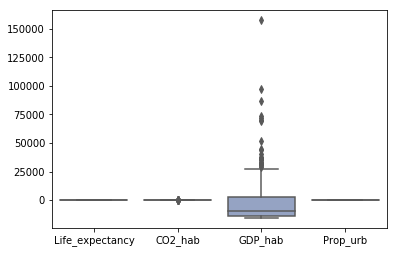

In [21]:
ax=sns.boxplot(data=(df_clustering - df_clustering.mean()), orient="v", palette="Set2")

Nous devons également réduire en raison de la variance élevée du PIB par habitant.

### Réduction 

(-2, 2)

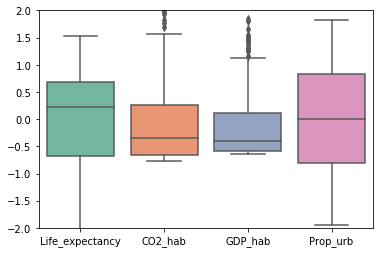

In [22]:
ax=sns.boxplot(data=(( df_clustering - df_clustering.mean() )/df_clustering.std()), orient="v", palette="Set2")
ax.set_ylim(-2,2)

Ce sont les données finales sur lesquelles on va travailler.

In [23]:
df_clustering_norm=(df_clustering - df_clustering.mean())/df_clustering.std()

# Recherche des outliers

Comme précédemment nous allons chercher les outliers grâce à DBSCAN. La première étape sera donc de paramétriser ce modèle en traçant la distance pour chaque point à son 4e voisin plus proche grâce à l'algorithme des KNN.

## Définition des paramètres de DBSCAN

In [24]:
nbrs = NearestNeighbors(n_neighbors=4, algorithm='ball_tree').fit(df_clustering_norm)
distances, indices = nbrs.kneighbors(df_clustering_norm)
distances_to_4 = distances[:,3]
distances_to_4 = sorted(distances_to_4 , reverse = False)

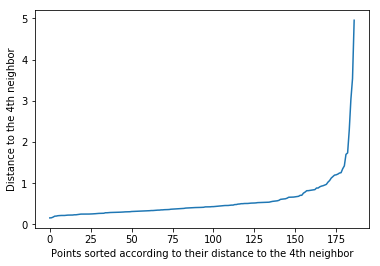

In [25]:
Index = range(0,len(distances_to_4))
plt.plot(Index , distances_to_4)
plt.xlabel('Points sorted according to their distance to the 4th neighbor')
t=plt.ylabel('Distance to the 4th neighbor')

D'après le graphique ci-dessus on observe un coude pour les pays d'indices entre 160 et 165, mais en conservant cet intervalle DBSCAN ne construit qu'un cluster. Ceci implique que les données ont une densité assez homogène. Pour repérer les pays "aberrants", il faut considérer les pays d'indices 180 à 185 (par rapport à la liste triée de la distance au quatrième voisin).

In [26]:
mean_dist_knee = sum(distances_to_4[180:185])/10
mean_dist_knee

1.017487451714065

On considérera donc un rayon de recherche d'environs 2.034, et un nombre minimum de point égal à trois, pour considérer un cluster.

## Annalyse des résultats de DBSCAN

In [27]:
outliers_det = DBSCAN(min_samples=3,eps=mean_dist_knee).fit(df_clustering_norm)
# Number of outliers
sum(outliers_det.labels_ == -1) 

11

D'après le rayon définit ci-dessus DBSCAN exclut 11 pays considérés comme outliers.

In [28]:
df_clustering_norm_lab= df_clustering_norm.copy(deep=True) # Copy of DF_kmeans1
df_clustering_norm_lab['Labels'] = outliers_det.labels_

# Représentation de DBSCAN

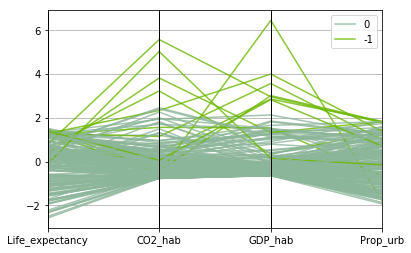

In [201]:
parallel_coordinates(df_clustering_norm_lab,'Labels', alpha=0.8)
plt.show()

In [29]:
df_clustering_countries= df_clustering_norm_lab.copy(deep=True) # Copy of DF_kmeans1
df_clustering_countries['Country'] = filtered_df.iloc[:, 4] 
print(df_clustering_countries[df_clustering_countries['Labels'] == -1])


     Life_expectancy   CO2_hab   GDP_hab  Prop_urb  Labels  \
14          0.639139  3.227095  0.356935  1.351241      -1   
21          1.133263  0.408998  2.858123  1.826102      -1   
65          1.237947  1.563794  1.540714 -0.667818      -1   
106         0.380145  3.820241  1.327003  1.826102      -1   
114         1.337238 -0.542794  6.456734 -1.817349      -1   
116         1.281552  2.334518  4.000964  1.382670      -1   
117         1.469396 -0.432315  3.012955  1.826102      -1   
147         1.275660  1.148876  3.567808  0.987643      -1   
159         0.790985  5.578079  2.962941  1.774427      -1   
188         1.402058  0.059274  2.832066  0.706427      -1   
196        -0.110061  5.029676  0.150981 -0.150322      -1   

                 Country  
14               Bahrain  
21               Bermuda  
65         Faroe Islands  
106               Kuwait  
114        Liechtenstein  
116           Luxembourg  
117     Macao SAR, China  
147               Norway  
159         

DBSCAN exclut le Lichetenstein, l'australie et Quatar ou encore le Bermuda à cause de leur fort PIB par habitant. Le Quatar, le Bahrain   ou encore la République de Trinite et Tobago sont exclus à cause de leur taux d'émissin de CO2 par habitant. 

In [30]:
df_without_outliers=df_clustering_norm_lab[df_clustering_norm_lab.Labels != -1]
df_without_outliers=df_without_outliers.drop('Labels',axis=1)

# Clustering

##  Détermination des centroïdes initiaux à l'aide d'un clustering hiérarchique


In [31]:
acwo = AgglomerativeClustering(affinity="euclidean", linkage="complete",n_clusters=5)
acwo.fit(df_without_outliers)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=5, pooling_func='deprecated')

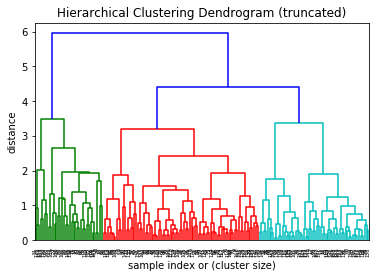

In [32]:
Z = linkage(df_without_outliers, 'complete')
# Z is a linkage matrix where distances are calculated owing complete method which is also named max
dn = dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

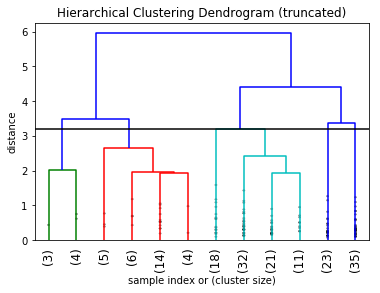

In [33]:
max_d = 3.2
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

Avec le clustering hiérarchique, on peut aussi initialiser les centroides de Kmeans.

In [34]:
clusters = fcluster(Z, max_d, criterion='distance')
df_without_outliers_dendro_cluster = df_without_outliers.copy()
df_without_outliers_dendro_cluster['clusters'] = clusters

In [35]:
cluster_dendro_tab = pds.crosstab(index=df_without_outliers_dendro_cluster['clusters'],  
                        columns="count") 
cluster_dendro_tab

col_0,count
clusters,
1,7
2,29
3,82
4,23
5,35


on remarque que les groupes assez sont  déséquilibré, le cluster 1 est cmomposé de 7 pays et le cluster 3 de 82 pays.

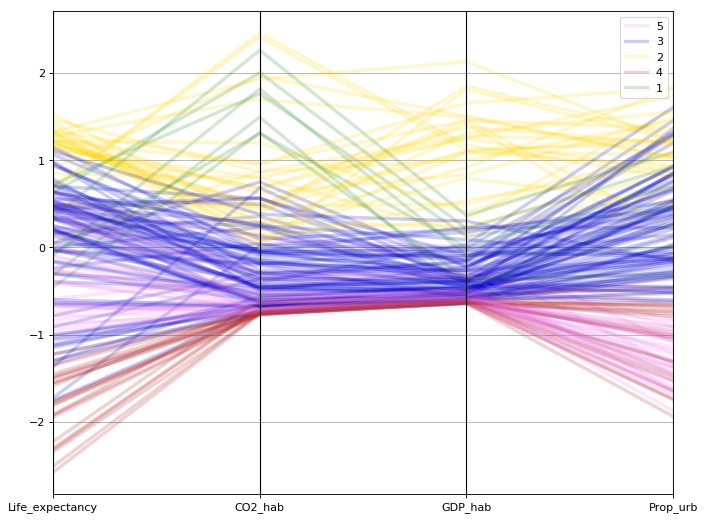

In [48]:
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
parallel_coordinates(df_without_outliers_dendro_cluster,'clusters', alpha=0.2,  color=('violet' , 'mediumblue', 'gold', 'firebrick', 'forestgreen') , linewidth = 3)
plt.show()

In [310]:
df_wo_dendro_cluster_country=df_without_outliers_dendro_cluster.copy()
df_wo_dendro_cluster_country['Country'] = filtered_df.iloc[:, 4] 

Subset_df_wo_dendro_cluster_country =df_wo_dendro_cluster_country.iloc[:,4:]

#Subset_df_wo_dendro_cluster_country[Subset_df_wo_dendro_cluster_country['clusters'] == 2]

* Le clusters 4 (rouge) rassemble les pays pays ayant la plus faible espérance de vie. On retrouve ainsi des pays comme le Burkina Faso, la Somalie ou encore la Zambie
* Le clusterss 5 (rose) rassemble des pays avec une espétance plu forte que les pays du cluster 4. Ces pays ont le taux d'urbanisation que les pays du cluster 4, mais un taux d'émission de CO2 et un PIB par habitant plus grand.
* Le cluster 1 (vert) rassemble les pays qui ont un fort taux d'émission de CO2 par habitant. On retrouve les pays producteurs de pétrole Arabie Saoudite l'Oman, où les pays producteur de gaz comme la Russie, ou les pays dont la principale sourece d'Energie est le Charbon comme l'Estonie
* Le cluster 2 (jaune) rassemble les pays riches qui ne sont nécessairement des forts émetteur de CO2. On retroue les pays de l'Europe Occidentale, le Canada ou encore l'Australie

In [57]:
means = df_without_outliers_dendro_cluster.groupby('clusters').mean()
Means =np.array(means)

## Kmeans

Pour définir le nombre de clusters optimal, on se base sur la SSE et le coefficient Silhouette.

SSE est un indice de la qualité du clustering. Il permet de mesurer à quel point les objets sont liés à leur cluster. En effet la SSE est somme des carrés des écarts entre chaque point et son centroïde.

Le coefficient silhouette et également un indice d'évaluation de la qualité du clustering; il apporte d'avantage d'informations par rapport à la SSE. En effet il traduit d'une part le degré d'apartenance des objets à leur cluster (en calculant la distance moyenne de chaque point aux différents points de son cluster), et d'autre part la séparation des clusters. Autrement dit plus le coefficient silhouette est grand, meilleur est le clustering.



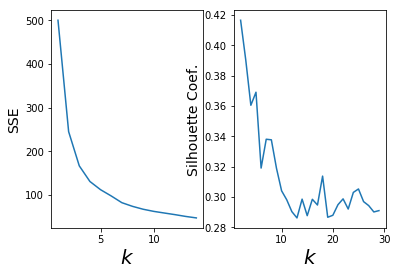

In [53]:
fig=plt.figure()
ax = fig.add_subplot(121)
sse=kmeans_SSE(df_without_outliers,ax)
ax = fig.add_subplot(122)
sil=silhouette_kmeans(df_without_outliers,ax)

La SSE suggère entre 2 et 5 clusters et le coefficient silhouette moins de 10. On choisira donc 5 clusters.

###  Premier Kmeans avec des centroïdes initiaux aléatoires

In [54]:
km=KMeans(n_clusters=5).fit(df_without_outliers)

###  Second Kmeans avec des centroïdes  initiaux du clustering hiérarchique

Initialisation des centroides grâce au clustering hiérarchique avec 5 clusters : permet de ne pas répéter KMeans

In [58]:
kmdendro_max = KMeans(n_clusters=5, init = Means).fit(df_without_outliers)

In [59]:
print('Centroïdes avec des centroïdes  initiaux du clustering hiérarchique')
print(kmdendro_max.cluster_centers_)

print('Centroïdes   avec des centroïdes initiaux aléatoirese')
print(km.cluster_centers_)

Centroïdes avec des centroïdes  initiaux du clustering hiérarchique
[[ 0.23392649  1.87038876  0.2300344   0.5943711 ]
 [ 1.17094964  0.66759541  1.12054929  1.12870963]
 [ 0.37664309 -0.15550312 -0.30394705  0.425645  ]
 [-1.62679852 -0.65205513 -0.57361915 -0.67916879]
 [-0.255168   -0.57188127 -0.52258087 -1.10439089]]
Centroïdes   avec des centroïdes initiaux aléatoirese
[[ 1.18353513  0.66244655  1.15752086  1.14557943]
 [-1.61779031 -0.64060261 -0.56580102 -0.61888872]
 [ 0.27249944  1.67139392  0.18234682  0.6329095 ]
 [ 0.39971191 -0.17471762 -0.30765026  0.40616098]
 [-0.2875929  -0.57501209 -0.52555536 -1.13737233]]


On retrouve des centroides quasi équivalents.

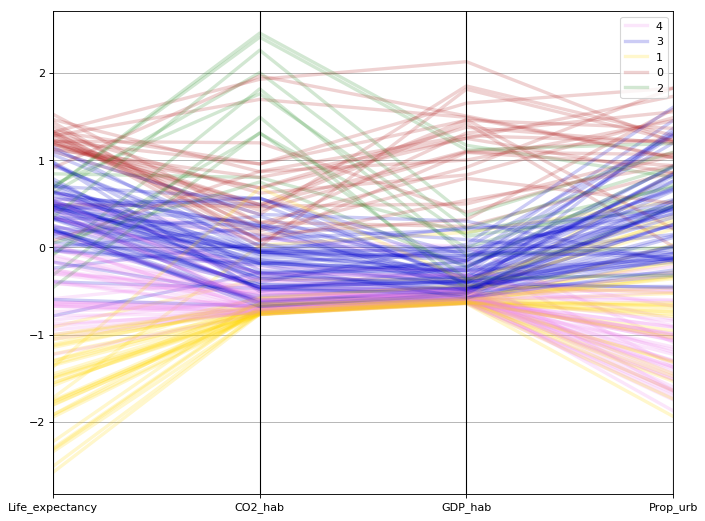

In [60]:
df_km_lab=df_without_outliers.copy()
df_km_lab['Labels']=km.labels_
fig=plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
parallel_coordinates(df_km_lab,'Labels', alpha=0.2,  color=('violet' , 'mediumblue', 'gold', 'firebrick', 'forestgreen') , linewidth = 3)
plt.show()

La variable la mieux par ce clustering est l'espérance de vie, l'interprétation des autres variables est moins évidente étant donné le chevauchement des groupes.

In [76]:
df_km_lab_country=df_km_lab.copy()
df_km_lab_country['Country'] = filtered_df.iloc[:, 4] 
Subset_df_km_lab_country =df_km_lab_country .iloc[:,4:]
#Subset_df_km_lab_country[Subset_df_km_lab_country['Labels'] == 3]

* Le cluster 1 (jaune) rasemble les pays ayant la plus faible espérance de vie. Ce groupe rassemble les pays les plus les plus pauvre comme la Somalie, l'Ouganda ou les pays guerre comme le Chad, etle sud Soudan. 
* Le cluster 4 (rose )regroupe des pays avec une espérance de vie  plus grande que celle du cluster 1. Ce cluster rassemble des pays avec un GDP plus habitant légerement plus élevé. Remarquons que le cluster 1 et 4 ont le profil au niveau du taux d'urbanisation.
* Les pays du cluster 3 (bleu) ont une meilleur espérance de vie que les pays des clusters 1 et 4, leur taux urbanisation est relativement important que celui des pays des cluster 1 et 4. Ce cluster regroupe des pays plus 'divers' après lecture de ses constituants. On retrouve nottament des pays très industrialisé comme l'Inde, le Bungladesh, ou encore le Vietman, maais aussi des pays moyennement riche d'Europe comme le Portugal, la Pologne ou la Roumanie.
* De la même manière les pays du cluster 2 (vert) ont en moyenne meilleure espérance de vie que les pays des clusters précédents. Ces pays ont un taux d'urbaniation important, un taux d'émission de CO2 par habitant très élevé. Ce cluster rassemble en effet les pay producteurs de pétrole comme les Emirats Arabe Unis, l'Arabie Soudite ou la Turquie.
* Enfin le cluster 0 (rouge) rassemble les pays riches qui ont une forte espérance de vie, un fort taux d'urbanisation, et un PIB par habitant élévé. Ces pays qui émetttent le moins de CO2 par habitant que les pays producteurs de pétrole. On retrouve  la France , l'Angleterre, l'Allemagne ou encore le Japon, et les USA.

### Analyse de stabilité de Kmeans

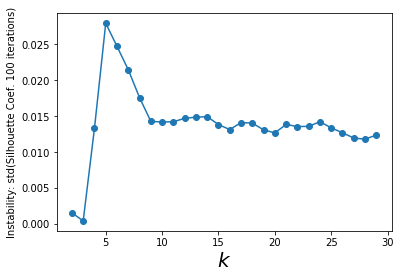

In [240]:
plot_stability(df_without_outliers)

Le coefficient Silhouette varie beaucoup autour des cinq clusters choisis : donc les clusters trouvés sont souvent différents.

## Evaluation de la qualité du Clustering par la SSE

In [83]:
df_without_outliers.shape


(176, 4)

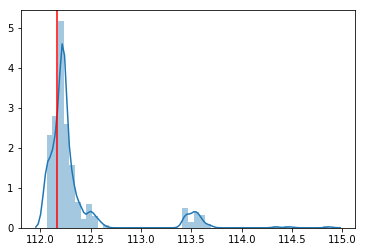

In [135]:
r = rand_sse(df_without_outliers,  5,kmdendro_max.inertia_ )

In [132]:
print(kmdendro_max.inertia_)
sum(r)

112.16487468964391


116

Dans 116 cas sur 500 on obtient aléatoire une SSE inférieur à celle obtenue par les Kmeans. Donc la probabilité d'observé par hasard une SSE de  inférieure à celle observée (112.16) est de 23.2%. La validité de ce clustering peut être discutée.

## DBSCAN

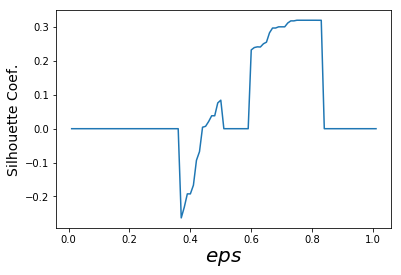

In [139]:
minpts=10
silhouette_dbscan(df_without_outliers,minpts,mean_dist_knee)

Le coefficient silhouette est maximisé pour un rayon autour de 0.7

In [140]:
db=DBSCAN(min_samples=3,eps=.7).fit(df_without_outliers)

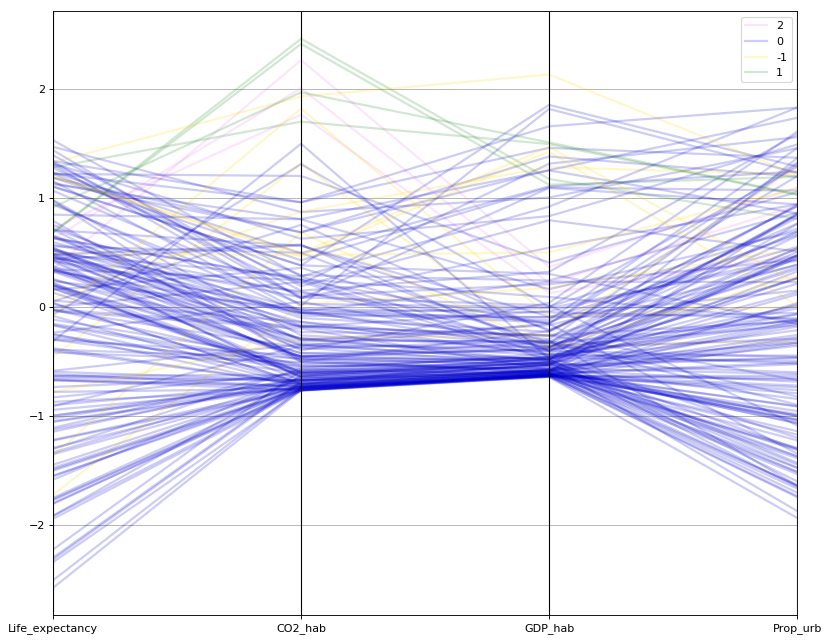

In [141]:
df_db_lab=df_without_outliers.copy(deep=True)
df_db_lab['Labels']=db.labels_
fig=plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
parallel_coordinates(df_db_lab,'Labels', alpha=0.2,  color=('violet' , 'mediumblue', 'gold', 'forestgreen'), linewidth=2 )
plt.show()

In [142]:
df_db_lab_country=df_db_lab.copy()
df_db_lab_country['Country'] = filtered_df.iloc[:, 4] 

Subset_df_db_lab_country =df_db_lab_country .iloc[:,4:]
#Subset_df_db_lab_country[Subset_df_db_lab_country['Labels'] == -1]
#df_db_lab_country[df_db_lab_country['Country']=='Ireland']

DBSCAN propose des résultats très différents de Kmeans. En effet rappelons que cet algorithme considère la densité des données. 
* Le cluster 0 (rose) inclut la quasi totalité des 184 pays avec 159 pays.
* Le cluster 2 (vert) regroupe les pays dont le taux d'émission de CO2 par habitant est très élevé. On retrouve ainsi l'Arabie Saoudite et Oman qui sont deux grands producteur de pétrole. On retrouve également Estonie car elle utilise le Charbon comme principale source d'énergie.  
* Le cluster 1 (jaune) rassemble les pays très pollueurs, mais pour lesquels le PIB par habitant est plus élevé que pour les pays du cluster 2. On retrouve ainsi les pays 'riches' comme les USA, le Canada ou encore les Emirats Arabe Unis. 
* Le cluster -1 (bleu) est le groupe des outliers, c'est à dire l'ensemble des pays pour lesquels la combinaison des variables observés est inattendue . On retrouve par exemple l'Afrique du Sud qui a une espérance de vie très faible mais un taux d'émission de CO2 relativement fort.

## Enveloppe des clusters

###  Enveloppe des clusters pour les Kmeans 

In [143]:
classes=df_km_lab['Labels']
features=df_km_lab.drop('Labels',axis=1)
#Tree_LE =Tree_LE.drop('Life_expectancy',axis=1)

km_tree  = DecisionTreeClassifier(criterion = 'entropy') # part aleatoire si deux split possibles 
                                                    # surtout si deux index sous equivalent gini entropy ...
clf = km_tree.fit(features,classes)

sortedLabelList = sorted(list(set((classes))))
for i in sortedLabelList :
    sortedLabelList[i]= str(sortedLabelList[i])
sortedLabelList

['0', '1', '2', '3', '4']

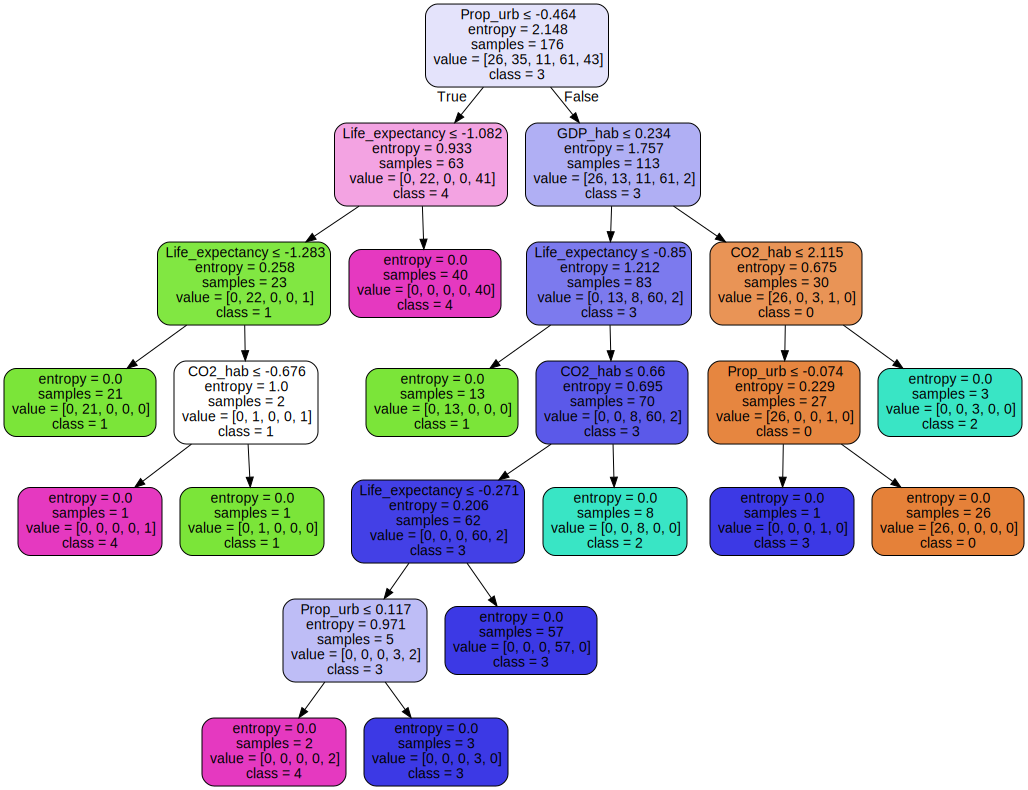

In [144]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=features.columns,  
                         class_names=sortedLabelList,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

L'arbre semble à première vue très complexe mais en interprétant uniquement les grands regroupements nous pouvons analyser les tendences de chaque clusters.
* Les clusters 1 et 4 ont taux d'urbanisation faibles comparément aux autres clusters. La seconde variable permettant de les séparer est l'espérance de vie, étant donné que les pays du cluster 1 ont une espérance de vie plus faible que ceux du cluster 1. Grâce à ces deux règles ont regroupe 22 pays parmis 35 appartenant au groupe 1, et 39 pays parmis 42 appartenant au groupe 4.
* Parmis les trois groupes restant, le PIB par habitant permet de séparer les pays des cluster 2 et 3 (pays riches) du cluster 0. Ensuite le taux d'émission permet de séparer les pays producteurs de pétroles (cluster 3) des pays du cluster 2 qui ont un taux d'émission de CO2 par habitant plus faible.  
* Finalement le cluster 0 est un cluster moyen.



### Enveloppe des clusters de DBSCAN

['-1', '0', '1', '2']


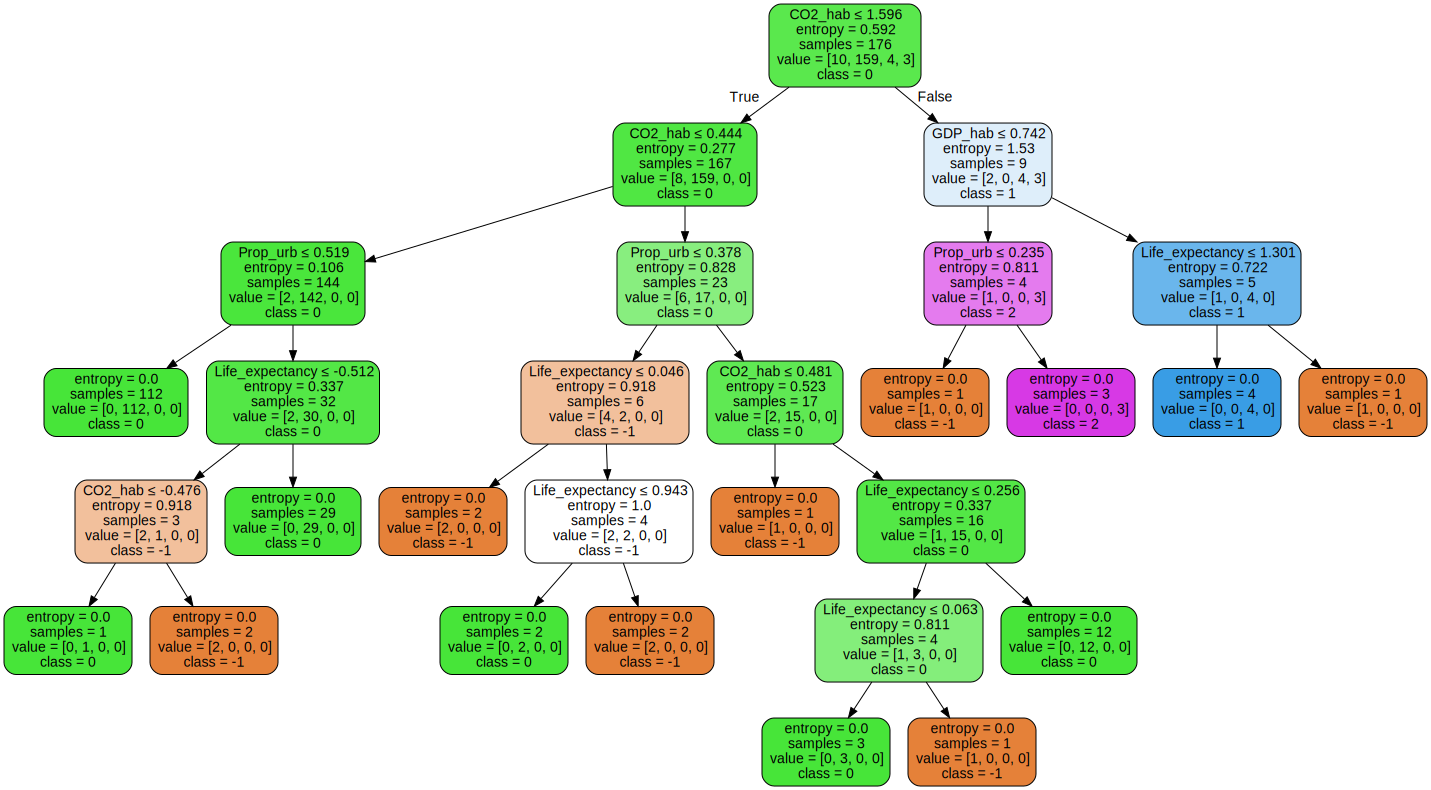

In [145]:
classes_db=df_db_lab['Labels']
features_db=df_db_lab.drop('Labels',axis=1)
db_tree  = DecisionTreeClassifier(criterion = 'entropy') # part aleatoire si deux split possibles 
                                                    # surtout si deux index sous equivalent gini entropy ...
clf_db = db_tree.fit(features_db,classes_db)

sortedLabelList_db = sorted(list(set((classes_db))))
for i in range(len(sortedLabelList_db)) :
    sortedLabelList_db[i]= str(sortedLabelList_db[i])
print(sortedLabelList_db)


dot_data = tree.export_graphviz(clf_db, out_file=None, 
                         feature_names=features.columns,  
                         class_names=sortedLabelList_db,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph



* Les pays des clusters 1 (USA, Canada, Japon) et 4 (Arabie Saoudite, Estonie, Oman ) sont différenciés des autres cluster par leur taux d'émission de CO2. Puis pour séparer ces deux groupes, le PIB par habitant est utilisé, sachant que les pays du cluster 1 ont un PIB par habitant plus élevé.
* Les pays du cluster -1 se trouvent quasiment dans toutes les branches de l'arbre, c'est pourquoi on les qualifie d'Outliers. 
* Les pays du cluster 0 rassemble le reste de pays, c'est ceux qui n'ont pas de valeurs extrême en termes d'émission de CO2 par habitant, et ceux qui n'ont une combinaison inusuel des variables observées.

### Enveloppe des clusters de DBSCAN

['1', '2', '3', '4', '5']


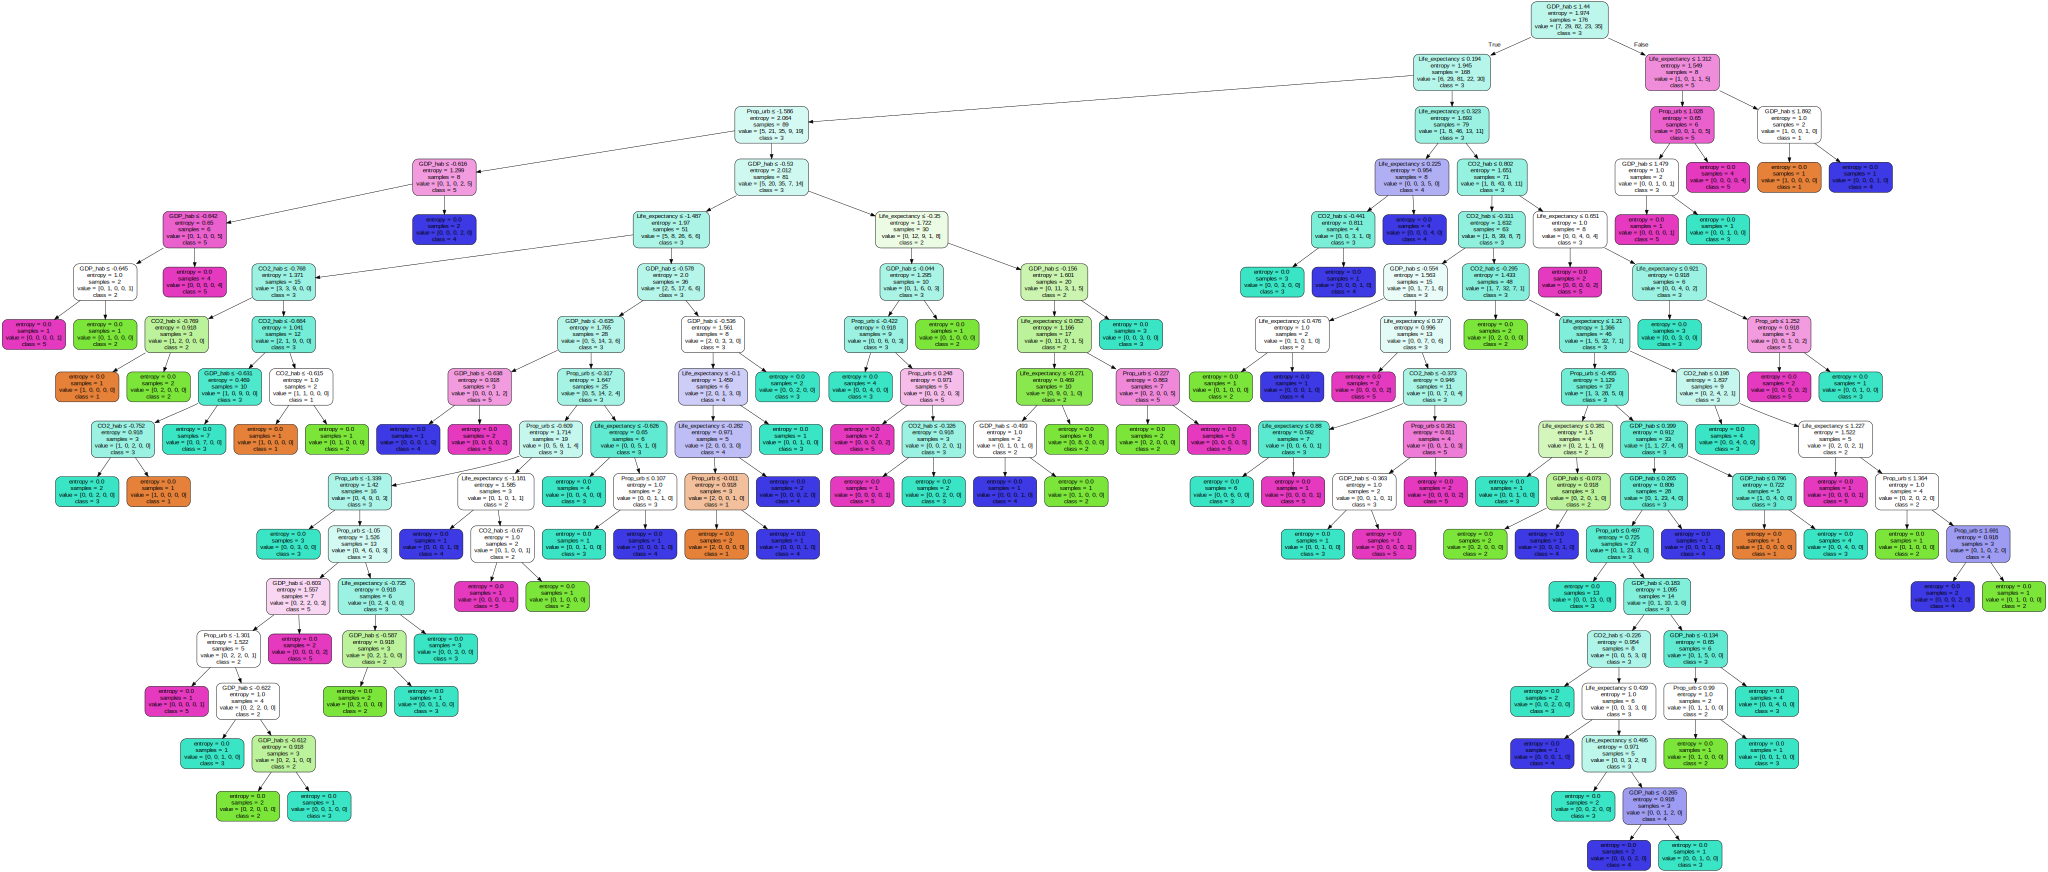

In [146]:
classes_dendro=df_without_outliers_dendro_cluster['clusters']
features_dendro=df_without_outliers_dendro_cluster.drop('clusters',axis=1)
dendro_tree  = DecisionTreeClassifier(criterion = 'entropy') # part aleatoire si deux split possibles 
                                                    # surtout si deux index sous equivalent gini entropy ...
clf_dendro = dendro_tree.fit(features_db,classes_dendro)

sortedLabelList_dendro = sorted(list(set((classes_dendro))))
for i in range(len(sortedLabelList_dendro)) :
    sortedLabelList_dendro[i]= str(sortedLabelList_dendro[i])
print(sortedLabelList_dendro)


dot_data = tree.export_graphviz(clf_dendro, out_file=None, 
                         feature_names=features.columns,  
                         class_names=sortedLabelList_dendro,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


* A l'instar des Kmeans DBSCAN sépare les clusters 4, et 5 des clusters du fait de leur faible taux d'urbanisation. Puis le cluster 4 est séparé du groupe 5 à cause d'une plus faible espérance de vie.
* Le cluster 1 (pays grands émetteurs de CO2) sont séparés des groupe 3 et 2 à cause d'un GDP par habitant relativement plus faible. De ce fait les pays du clustrer 2 sont caractérisé par un PIB par habitant plus grand.
* Le cluster 3 groupe est le groupe "moyen"

# Comparaison des clusters

## Matrice de contingences

### Création des matrices de contingences

In [70]:
cm_kmdb=confusion_matrix(km,db, 'km', 'db', True , True , 'None', 'None')
cm_kmac=confusion_matrix(km,acwo, 'km', 'cah', False , False ,df_km_lab_country['Labels'],df_without_outliers_dendro_cluster['clusters'] )
cm_dbac=confusion_matrix(db,acwo, 'db', 'cah', True  , False , 'None' , df_without_outliers_dendro_cluster['clusters'])

### Comparaison des Kmeans et de DBSCAN

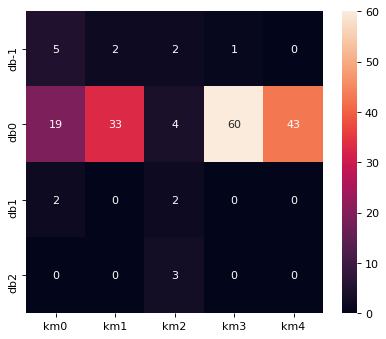

In [74]:
fig=plt.figure(figsize=(6, 5), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(cm_kmdb, annot=True)

Comme la cluster 0 de DBCSAN rassemble les 'core points', donc la majorite des pays, ce clulster est celui qui  contribue le plus à tous les clusters défini par Kmeans. Kmeans ne différenciant pas les "border points"(db1 et db2) et les "noise points"(db-1), ces groupes sont également réparties dans tous les clusters formés par Kmeans.


**Conclusion : les clusters de DBSCAN et de Kmeans sont très différents**

### Comparaison du clustering hiérarchique et  de Kmeans 

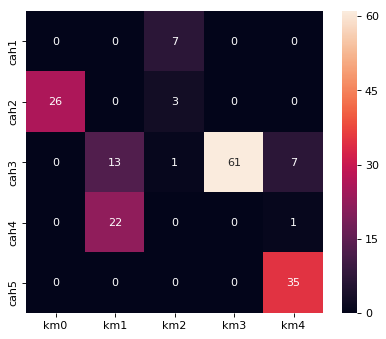

In [72]:
fig=plt.figure(figsize=(6, 5), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(cm_kmac, annot=True)

Les groupes formés par le Clustering hiérarchiques sont similaires à ceux calculés par les Kmeans.
* Ceci est particulier vrai pour le cluster 0 de Kmeans (pays riches) qui correspond parfaitement au cluster 2 du clustering hiérarchique. Les deux algorithmes ont donc identiéfié le même groupe des pays riches.
* Le cluster 1 de Kmeans qui correspond au pays les plus pauvres, est partagé entre les clusters 3 et 4 du dendrgogramme qui peuvent être assimilé au groupe médian et récirpoquement au groupe des pays les plus pauvres.
* Le cluster 2  des Kmeans qui regroupe les pays ayant un fort taux d'émission de CO2 par habitant,  est bien représenté par le cluster 1 du clustering hiérarchique. On retrouve toutefois 3 pays du cluster 2 des Kmeans qui appartiennent au cluster 2 du dendrogramme (cluster des pays riches).
* Le cluster 3 des Kmeans, cluster des pays médians, est parfaitement représenté par le cluster 3 du dendrogramme.
* Le cluster 4 des Kmeans qui correspond au second groupe des pays pauvres, correspond au cluster 5 du dendrogramme, bien que le clustering hiérarchique considère que parmis les 42 pays du clusters 4 des Kmeans 7 appartiennent au groupe médian cluster 3 du dendrogramme. 

**Conclusion : Malgré quelques différences entre les groupes formés par les deux algorithme, l'interprétation générale de ces deux clusterings est identique.**

###   Comparaison du clustering hiérarchique et de DBSCAN

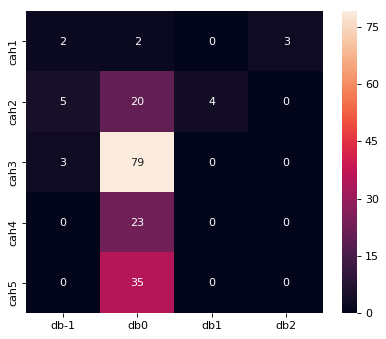

In [73]:
fig=plt.figure(figsize=(6, 5), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(cm_dbac, annot=True)

À l'instar de la comparaison effectuée entre les Kmeans et DBSCAN, l'ensemble des pays sont esssentiellement regroupés dans le cluster 0 de DBSCAN qui inclut ainsi tous les groupes formés par le clustering hiérarchique. En effet ce cluster 0 corrrespond au 'core points'. Remarquons par ailleurs que tous les points formant le cluster 1 de DBSACN (pays riches et fort émetteurs de gaz à effet de serre) sont inclus dans la cluster 2 du dendrogramme. De plus tous les pays du cluster 2 de DBSCAN (pays ayant un fort taux d'émission de CO2 mais avec un PIB par habitant moyen) sont inclus dans le cluster 1 du dendrogramme. 



## Comparaison de la SSE des clusterings avec des jeux de données aléatoires

# Création d'une étiquette de classe

Dans la suite de notre étude nous allons étudier nos données à l'aide d'une étiquette de classe, triant les pays en fonction de leur PIB par habitant. On considèrera 4 groupes :
* Les pays très pauvres
* Les pays pauvres
* Les pays moyennement riche
* Les pays riches

# Création des classe à l'aide d'un Kmeans en 1D sur le GDP par habitant

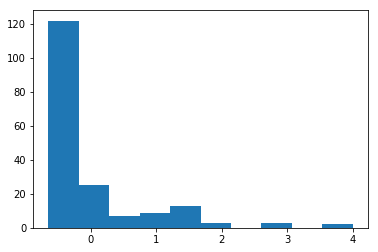

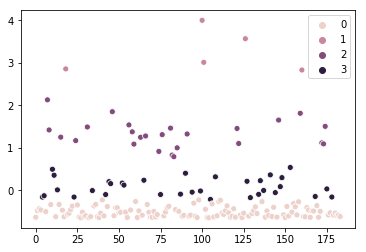

In [31]:
V_GDP_hab  = np.array(df_without_outliers['GDP_hab'])
KM_GDP = kmeans_1D(V_GDP_hab  , 4)
plot_kmeans1D(V_GDP_hab,KM_GDP.labels_)
INDEX = np.arange(0,len(V_GDP_hab))
sns.scatterplot(INDEX,V_GDP_hab, hue=KM_GDP.labels_ )

D'après ces représentations on repère des classes très hétérogènes où les pays les plus sont les plus nombreux. On observe aussi cinq pays très riches par rapport aux autres groupes